<a href="https://colab.research.google.com/github/eversonmariano/Notebooks-Colab/blob/main/Clientes_de_Cartao_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação com dados desbalanceados

##Carregamento da base de dados

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
dataset = pd.read_csv('credit_data.csv')

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
#dropna = apaga os dados nulos e atualiza na propria variavel
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


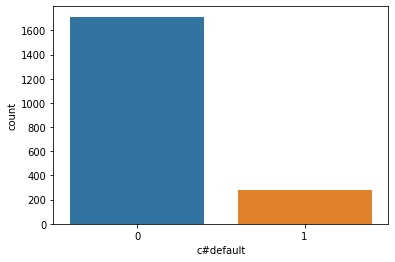

In [ ]:
#seaborn = biblioteca no python que especifica para visualizaçao e criação de graficos 
import seaborn as sns
sns.countplot(dataset['c#default']) 

In [ ]:
X = dataset.iloc[:, 1:4].values

In [ ]:
X.shape

(1997, 3)

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
Y = dataset.iloc[:, 4].values

In [ ]:
Y.shape

(1997,)

In [ ]:
Y

array([0, 0, 0, ..., 1, 0, 0])

##Base de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [ ]:
X_treinamento.shape, Y_treinamento.shape

((1597, 3), (1597,))

In [ ]:
X_teste.shape, Y_teste.shape

((400, 3), (400,))

In [ ]:
#Valores exatos
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
#Porcentagem das pessoas que pagam o emprestimo (0.8582...) e as que nao pagam é 0.1414...
1714 / len(dataset), 283 / len(dataset) 

(0.8582874311467201, 0.14171256885327993)

In [ ]:
np.unique(Y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [ ]:
226 / len(Y_treinamento), 1371 / len(Y_treinamento)

(0.14151534126487164, 0.8584846587351284)

In [ ]:
#comparar a base de dados de teste para indicar se a amostra estratificada foi retirada corretamente
np.unique(Y_teste, return_counts=True)  

(array([0, 1]), array([343,  57]))

In [ ]:
57 / len(Y_teste)

0.1425

##Classificação com Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Gerando a tabela de probabilidade dos dados
modelo = GaussianNB()
#Encaixar o algoritmo naive bayes nos dados que temos (X_treinamento, Y_treinamento)
modelo.fit(X_treinamento, Y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Y_teste

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Percentual de acerto
from sklearn.metrics import accuracy_score

In [ ]:
#Percentual de acerto
accuracy_score(previsoes, Y_teste)

0.93

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#gerando uma matriz de confusão
cm = confusion_matrix(previsoes, Y_teste)
cm

array([[338,  23],
       [  5,  34]])

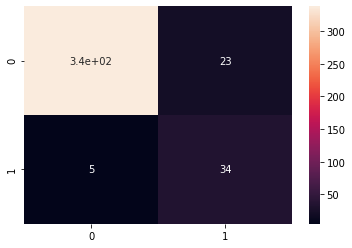

In [ ]:
#sns é uma biblioteca do seaborn e heatmap é um mapa de calor
sns.heatmap(cm, annot=True)

In [ ]:
#Percentual de acerto para todo o sistema (acuracia)
(335 + 33) / (335 + 24 + 33 + 8)

0.92

In [ ]:
#Percentual de acertos para pessoas que pagam emprestimo
335 / (335 + 24)

0.9331476323119777

In [ ]:
#Percentual de acertos para pessoas que NÃO pagam emprestimo
33 / (33 + 8)

0.8048780487804879

In [ ]:
#Perdas: 5.000,00 reais para cada pessoa que não pagam o emprestimo
#Clientes não pagadores: 1000
1000 * 18 / 100


180.0

In [ ]:
#Prejuizos
180 * 5000

900000

##Subamostragem (Undersampling) - Tomek links

https://imbalanced-learn.org/stable/user_guide.html#user-guide

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_under, y_under, id_under = tl.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_under.shape, y_under.shape, id_under

((1897, 3), (1897,), array([   0,    1,    2, ..., 1994, 1995, 1996]))

In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [ ]:
X_treinamento_under, X_teste_under, y_treinamento_under, y_teste_under = train_test_split(X_under,
                                                                                          y_under,
                                                                                          test_size=0.2,
                                                                                          stratify=y_under)
X_treinamento_under.shape, X_teste_under.shape

((1517, 3), (380, 3))

In [ ]:
modelo_under = GaussianNB()
modelo_under.fit(X_treinamento_under, y_treinamento_under)
previsoes_under = modelo_under.predict(X_teste_under)
accuracy_score(previsoes_under, y_teste_under)

0.9184210526315789

In [ ]:
matr_confusao_under = confusion_matrix(previsoes_under, y_teste_under)
matr_confusao_under

array([[314,  22],
       [  9,  35]])

In [ ]:
#Percentuam de acerto para a classe 0 que sao os clientes que pagam.
314 / (314 + 22)

0.9345238095238095

In [ ]:
#Percentuam de acerto para a classe 1 que sao os clientes que NAO pagam.
35 / (35 +9)

0.7954545454545454

##Sobreamostragem (oversampling) - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
#Aqui é onde a magica acontece
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [ ]:
X_treinamento_over, X_teste_over, y_treinamento_over, y_teste_over = train_test_split(X_over, y_over,
                                                                                      test_size = 0.2,
                                                                                      stratify=y_over)

In [ ]:
X_treinamento_over.shape, X_teste_over.shape

((2742, 3), (686, 3))

In [ ]:
modelo_over = GaussianNB()
modelo_over.fit(X_treinamento_over, y_treinamento_over)
previsoes_over = modelo_over.predict(X_teste_over)
accuracy_score(previsoes_over, y_teste_over)

0.9300291545189504

In [ ]:
cm_over = confusion_matrix(previsoes_over, y_teste_over) 
cm_over

array([[307,  12],
       [ 36, 331]])

In [ ]:
#Percentuam de acerto para a classe 0 que sao os clientes que pagam.
307 / (307 + 12)

0.9623824451410659

In [ ]:
#Percentuam de acerto para a classe 1 que sao os clientes que NAO pagam.
331 / (331 + 36)

0.9019073569482289

In [ ]:
#simulação
#Perdas: 5.000 por cada cliente
#Clientes nao pagadores: 1.000
1000 * 11 / 100

110.0

In [ ]:
110 * 5000

550000

In [ ]:
#Prejuizo reduzido pela tecnica de oversampling
900000 - 550000

350000